<a href="https://colab.research.google.com/github/ABHAYB642/Loan-Eligibility-Prediction/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ABHAY BIRAMANE**
## LOAN ELIGIBILITY PREDICTION

### IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### IMPORT CSV AS DATAFRAME

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Loan%20Eligibility%20Prediction.csv')

### Get First Five Rows Of Dataframe

In [ ]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


### Get Information of dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


### Get Column Names

In [ ]:
df.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

### Get Summary Statistics

In [ ]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Get Shape of Dataframe

In [ ]:
df.shape

(614, 13)

### Get Unique values in y Variable

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df.groupby('Loan_Status').mean()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,
N,304.406250,0.864583,5446.078125,1877.807292,143.869792,339.562500,0.572917
Y,308.907583,0.853081,5384.068720,1504.516398,141.182464,338.587678,0.976303


### Get Categories and Counts of Categorical Variables

In [ ]:
df['Gender'].value_counts()

0    499
1    115
Name: Gender, dtype: int64

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df['Married'].value_counts()

Yes    399
No     215
Name: Married, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

No     523
Yes     91
Name: Self_Employed, dtype: int64

In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

### Get Encoding Of Categorical Features

In [ ]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
df.replace({'Married':{'No':0,'Yes':1}},inplace=True)

In [ ]:
df.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)

In [ ]:
df.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':1}},inplace=True)

In [ ]:
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)

### Define y

In [ ]:
y=df['Loan_Status']

In [ ]:
y.shape

(614,)

In [ ]:
y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
609    N
610    N
611    N
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [ ]:
X=df[['Gender','Married','Dependents','Education','Self_Employed','Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History','Property_Area']]

In [ ]:
X=df.drop(['Customer_ID','Loan_Status'],axis=1)

In [ ]:
X.shape

(614, 11)

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,2378,0.0,9,360,1,1
1,0,1,2,1,0,1299,1086.0,17,120,1,1
2,0,0,0,0,0,3620,0.0,25,120,1,1
3,0,1,0,1,1,3459,0.0,25,120,1,1
4,0,1,1,1,0,5468,1032.0,26,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,2947,1603.0,10,360,1,1
610,0,0,0,1,0,4680,2087.0,15,360,1,1
611,0,1,2,1,1,6633,0.0,25,360,0,0
612,0,1,1,0,0,2492,2375.0,30,360,1,0


### Get X Variables Standrdized

In [ ]:
X_std=X[['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
X_std=ss.fit_transform(X_std)

In [ ]:
X_std

array([[-0.49564665, -0.55448733, -1.52878429,  0.30300926],
       [-0.6724141 , -0.18306108, -1.4368431 , -3.14231829],
       [-0.29217568, -0.55448733, -1.34490192, -3.14231829],
       ...,
       [ 0.20142983, -0.55448733, -1.34490192,  0.30300926],
       [-0.47697057,  0.25779382, -1.28743867,  0.30300926],
       [-0.49204249,  0.74516252, -1.34490192, -2.2809864 ]])

In [ ]:
X_std=X[['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']]=pd.DataFrame(X_std,columns=['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,-0.495647,-0.554487,-1.528784,0.303009,1,1
1,0,1,2,1,0,-0.672414,-0.183061,-1.436843,-3.142318,1,1
2,0,0,0,0,0,-0.292176,-0.554487,-1.344902,-3.142318,1,1
3,0,1,0,1,1,-0.318552,-0.554487,-1.344902,-3.142318,1,1
4,0,1,1,1,0,0.010573,-0.201530,-1.333409,0.303009,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,-0.402430,-0.006240,-1.517292,0.303009,1,1
610,0,0,0,1,0,-0.118521,0.159294,-1.459828,0.303009,1,1
611,0,1,2,1,1,0.201430,-0.554487,-1.344902,0.303009,0,0
612,0,1,1,0,0,-0.476971,0.257794,-1.287439,0.303009,1,0


### Get Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((429, 11), (185, 11), (429,), (185,))

### Get Model Train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(max_depth=3,random_state=2529)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2529)

### Get Model Prediction

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
y_pred.shape

(185,)

In [ ]:
y_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

### Get Probablity of Each Predicted Class

In [ ]:
dt.predict_proba(X_test)

array([[0.1547619 , 0.8452381 ],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.85294118, 0.14705882],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.85294118, 0.14705882],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [1.

### Get Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 22  36]
 [  4 123]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.85      0.38      0.52        58
           Y       0.77      0.97      0.86       127

    accuracy                           0.78       185
   macro avg       0.81      0.67      0.69       185
weighted avg       0.80      0.78      0.75       185



### Get Decision Tree Plot

In [ ]:
from sklearn.tree import plot_tree

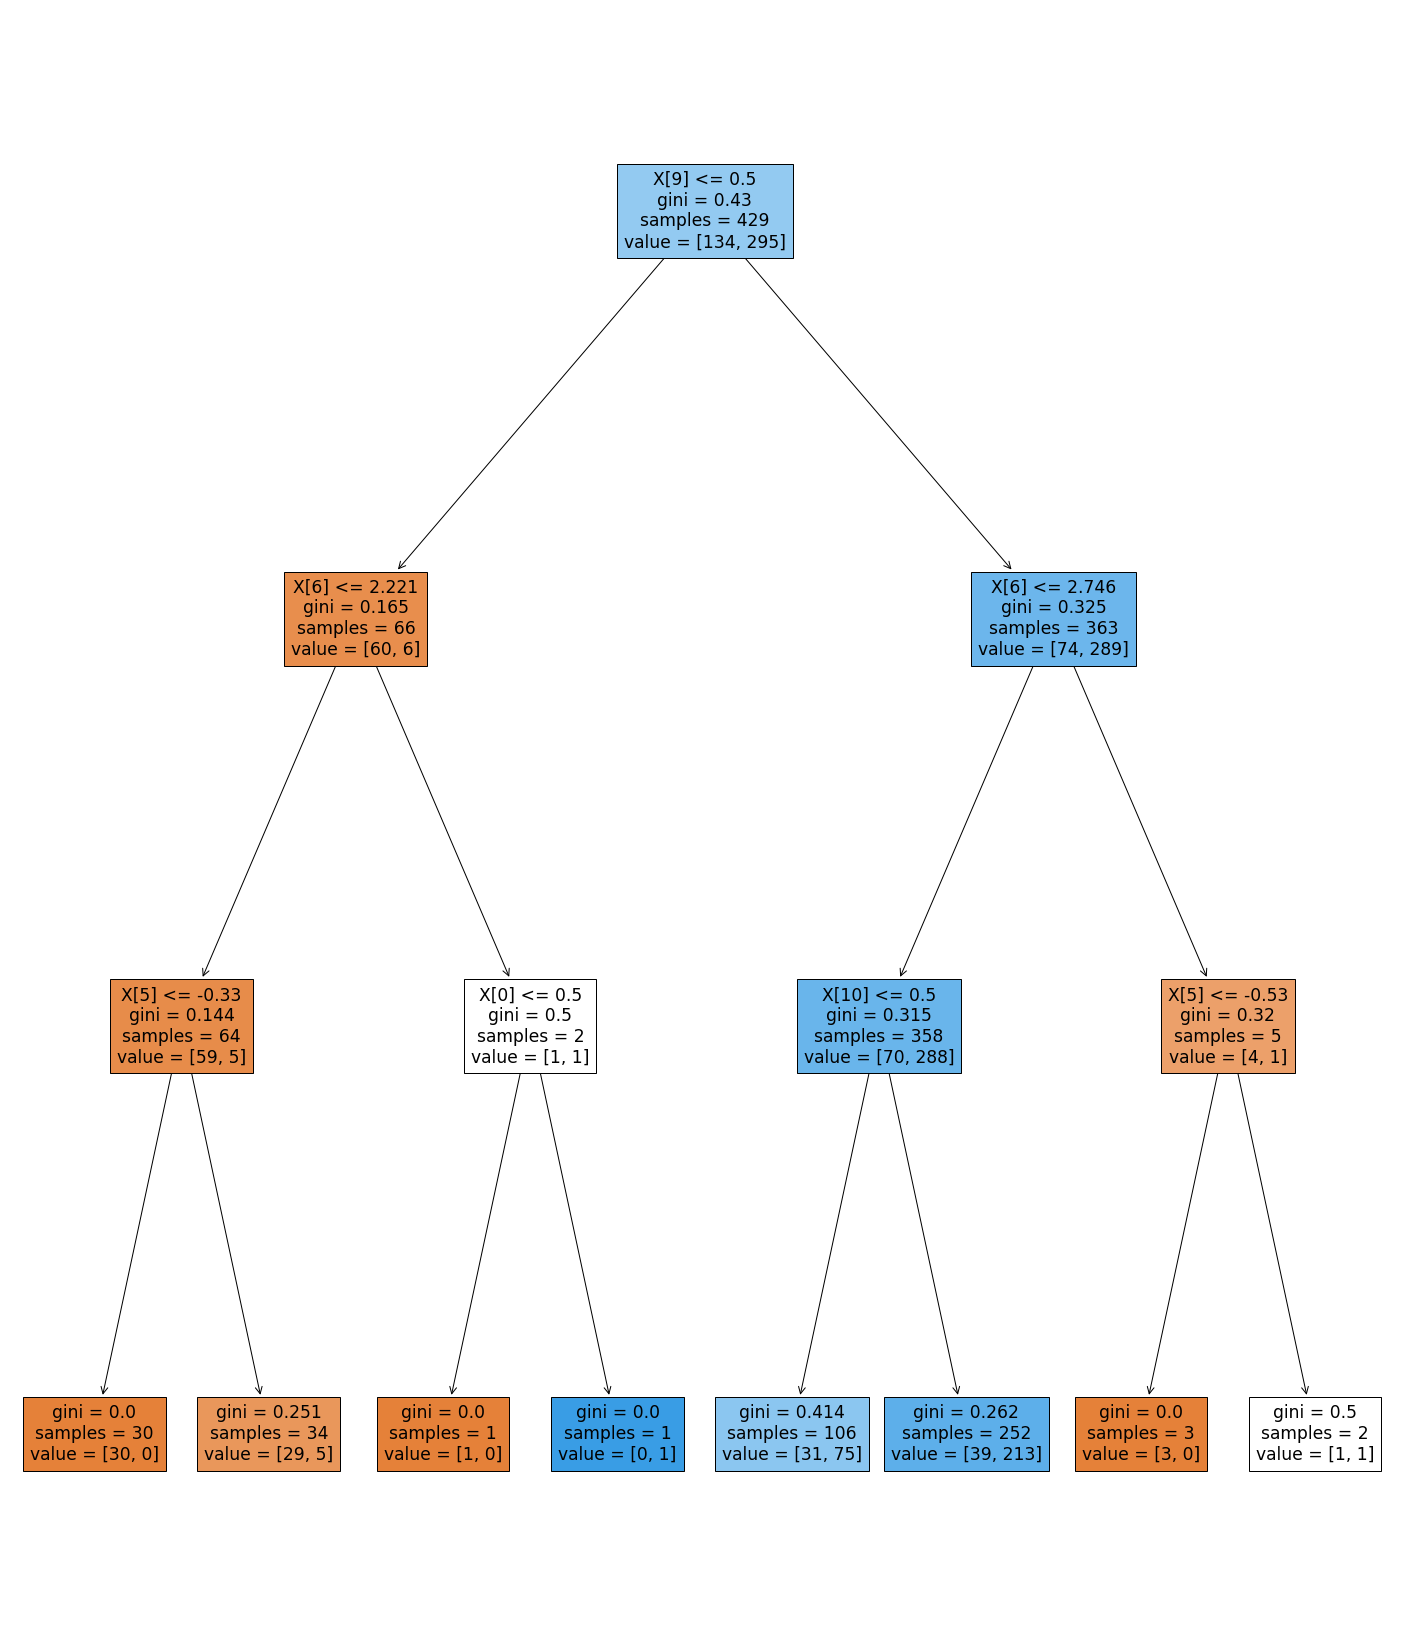

In [ ]:
plt.figure(figsize=(25,30))
plot_tree(dt,filled=True);